In [11]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [13]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [14]:
lines = data.readlines()
len(lines)

7352

In [15]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [16]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [17]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [18]:
#pca = PCA(n_components=4)
#pca.fit(z)

In [19]:
#print(pca.explained_variance_ratio_)

In [32]:
#sample = pca.transform(z)
#sample[9]
scale=StandardScaler()
scale.fit(z)
sample=scale.transform(z)

**Elbow using Sum of Squared Errors**

In [33]:
SSE={}
K = range(2,10)
for k in K :
    SSE[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print(labels)
    #print(sample_transformed)
    for i in range(0,k):
        #print('shit')
        cluster_datapoints = sample_transformed[labels==i]
        #print(cluster_datapoints)
        #Mean distance of data points in this cluster from center
        cluster_mean = cluster_datapoints[:,i].mean()
        print('cluster mean ='+str(cluster_mean))
        #Calculate Sum of Squared error by substracting cluster mean 
        #from distance of each point from respective centers 
        for datapoint in cluster_datapoints:
            SSE[k]+= (datapoint[i]-cluster_mean)**2
    print(SSE)

cluster mean =19.889385243208814
cluster mean =13.636888260588789
{2: 279561.3232594984}
cluster mean =31.65752165570085
cluster mean =30.612854785809578
cluster mean =23.79274935918915
{2: 279561.3232594984, 3: 156307.86228356345}
cluster mean =15.793628092626891
cluster mean =29.894271452688546
cluster mean =17.786692947409033
cluster mean =25.26347020243457
{2: 279561.3232594984, 3: 156307.86228356345, 4: 237309.98550026809}
cluster mean =27.838524626591212
cluster mean =41.54081344856385
cluster mean =39.5844830366315
cluster mean =15.671951659766336
cluster mean =37.03031818506591
{2: 279561.3232594984, 3: 156307.86228356345, 4: 237309.98550026809, 5: 138278.04933168757}
cluster mean =41.07728328617581
cluster mean =56.716358384261866
cluster mean =15.033757879307318
cluster mean =39.086081112205534
cluster mean =18.244315776695217
cluster mean =63.518509783439974
{2: 279561.3232594984, 3: 156307.86228356345, 4: 237309.98550026809, 5: 138278.04933168757, 6: 114386.7084778497}
clus

In [34]:
SSE_array=[]
slope=[]
for key,value in SSE.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[279561.3232594984, 156307.86228356345, 237309.98550026809, 138278.04933168757, 114386.7084778497, 137868.17911234056, 128842.9893219474, 91065.51983550351]


[[2, -123253.46097593496],
 [3, 81002.12321670464],
 [4, -99031.93616858052],
 [5, -23891.34085383787],
 [6, 23481.470634490863],
 [7, -9025.189790393153],
 [8, -37777.46948644389]]

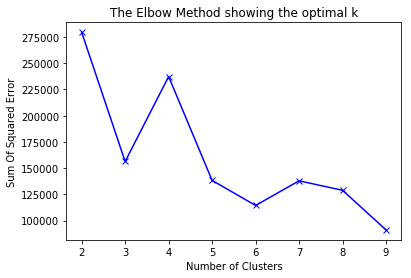

In [35]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Of Squared Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [36]:
slope

[[2, -123253.46097593496],
 [3, 81002.12321670464],
 [4, -99031.93616858052],
 [5, -23891.34085383787],
 [6, 23481.470634490863],
 [7, -9025.189790393153],
 [8, -37777.46948644389]]

In [37]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 5
Optimal Number of Clusters = 6
